In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#폰트
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

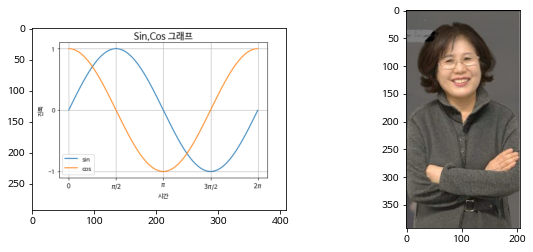

In [5]:
from PIL import Image
img1=Image.open('삼각함수.PNG')
img2=Image.open('munja.JPG')

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [6]:
def f(t):
  return np.exp(-t) * np.cos(2*np.pi*t)

def g(t):
  return np.sin(np.pi*t)

In [7]:
t1=np.arange(0.0,5.0,0.01)
t2=np.arange(0.0,5.0,0.01)

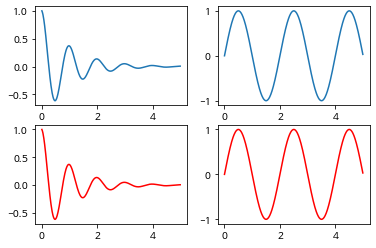

In [12]:
plt.subplot(221)
plt.plot(t1,f(t1))
plt.subplot(222)
plt.plot(t2,g(t2))
plt.subplot(223)
plt.plot(t1,f(t1),'r-')
plt.subplot(224)
plt.plot(t2,g(t2),'r-')
plt.show()

* 앤스컴 콰르텟(Anscombe's quartet)

In [13]:
import seaborn as sns
ans=sns.load_dataset('anscombe')
ans.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


In [14]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

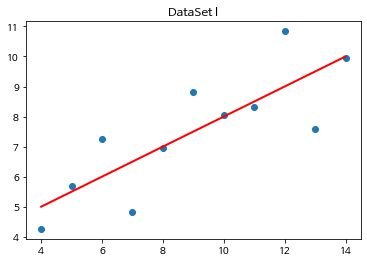

In [17]:
#dataset 선택해서 그려봄
ds=ans[ans.dataset=='I']
plt.scatter(ds.x,ds.y,marker='o')
plt.plot([4,14],[5,10],'-r',lw=2)
plt.title("DataSet l")
plt.show()

In [18]:
ans.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

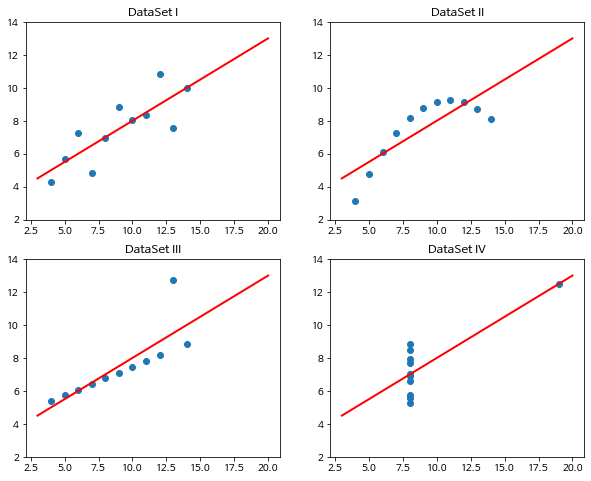

In [19]:
plt.figure(figsize=(10,8))

for index,roman in enumerate(ans.dataset.unique()):
  plt.subplot(2,2,index+1)
  ds=ans[ans.dataset==roman]
  plt.scatter(ds.x,ds.y,marker='o')
  plt.ylim(2,14)
  plt.plot([3,20],[4.5,13],'-r',lw=2)
  plt.title(f"DataSet {roman}")
  
plt.show()

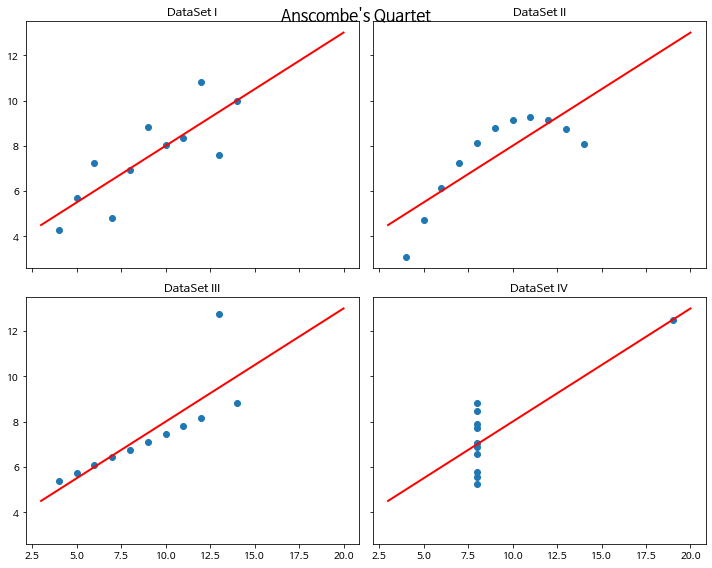

In [24]:
fig,axes=plt.subplots(2,2,figsize=(10,8),sharex=True,sharey=True)

for index,roman in enumerate(ans.dataset.unique()):
  ds=ans[ans.dataset==roman]
  ax=axes[index//2,index%2]
  ax.scatter(ds.x,ds.y,marker='o')
  ax.plot([3,20],[4.5,13],'-r',lw=2)
  ax.set_title(f"DataSet {roman}")

fig.suptitle("Anscombe's Quartet",fontsize=16)  
plt.tight_layout()
plt.show()

pandas 시각화

1. Line graph

In [25]:
np.random.seed(2022)
df=pd.DataFrame(np.random.randn(100,3),index=pd.date_range('2022-1-1',periods=100),columns=['A','B','C']).cumsum()
df.head(2)

,A,B,C
2022-01-01,-0.000528,-0.274901,-0.139286
2022-01-02,1.984158,0.007208,0.621523


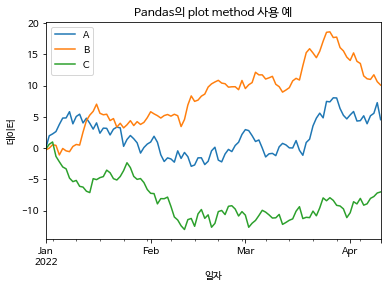

In [27]:
df.plot()
plt.title('Pandas의 plot method 사용 예')
plt.xlabel('일자'), plt.ylabel('데이터')
plt.show()

2. Bar chart

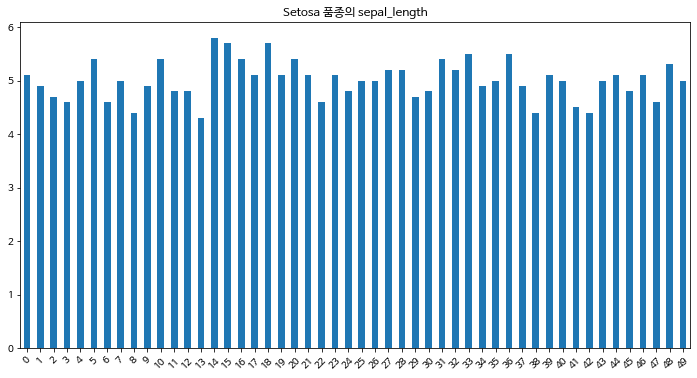

In [28]:
import seaborn as sns
iris = sns.load_dataset('iris')
plt.figure(figsize=(12,6))
iris.sepal_length[:50].plot(kind='bar',rot=45)  #rot=45 글씨가 45도 돌아감
plt.title('Setosa 품종의 sepal_length')
plt.show()

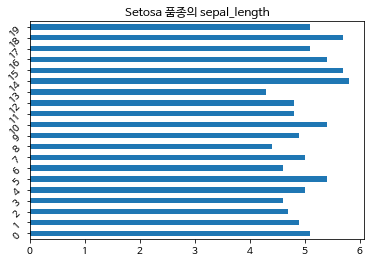

In [30]:
iris.sepal_length[:20].plot(kind='barh',rot=45)  #rot=45 글씨가 45도 돌아감 , h 붙이면 가로로 
plt.title('Setosa 품종의 sepal_length')
plt.show()

In [31]:
df2=iris.groupby('species').mean()

In [32]:
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


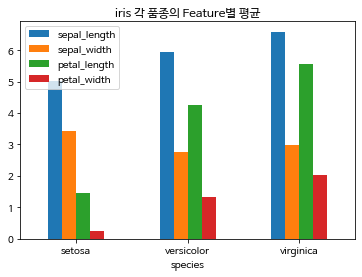

In [38]:
df2.plot.bar(rot=360)
plt.title('iris 각 품종의 Feature별 평균')
plt.show()

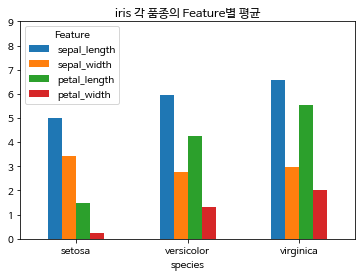

In [42]:
df2.columns.name="Feature"
df2.plot.bar(rot=0)
plt.ylim(0,9)
plt.title('iris 각 품종의 Feature별 평균')
#plt.grid()
plt.show()

3. pie chart

In [43]:
titanic=sns.load_dataset('titanic')
s=titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

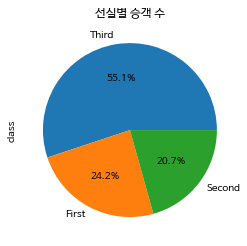

In [45]:
s.plot.pie(autopct='%.1f%%')
plt.title('선실별 승객 수')
plt.show()

4. boxplot

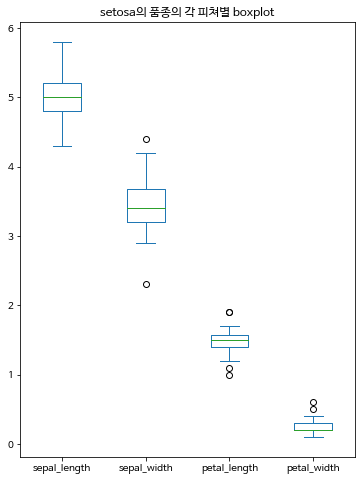

In [46]:
iris[iris.species=='setosa'].plot.box(figsize=(6,8))
plt.title('setosa의 품종의 각 피쳐별 boxplot')
plt.show()

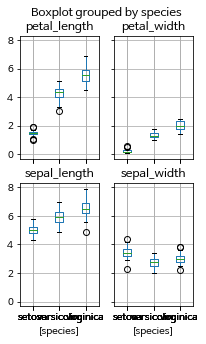

In [52]:
iris.boxplot(by='species',figsize=(3,5))
plt.show()

In [76]:
def solution(n):
    n_list = list(map(int,str(n)))
    n_reverse=n_list.reverse()
    return n_reverse

print(solution(12345))



None


In [85]:
n=123
n_list=list(map(int,str(n)))
n_list
sum(n_list)

6